In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.metrics import accuracy_score

In [2]:
# Question A1:
# Develop a perceptron of a particular data

# Data for logic gates
data_gates_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [3]:
# Creating an activation function
def activation_step_function(number):
    if number >= 0:
        return 1
    else:
        return 0


In [4]:
# Applying data on the and gate
weight0 = 10
weight1 = 0.2
weight2 = -0.75
learning_rate = 0.05

# Applying the perceptron equation
target_output = [0, 0, 0, 1]
error_count = []
epochs_count = 0
converged = False
while not converged:
    total_error = 0
    for i in range(len(data_gates_input)):
        data_a = data_gates_input[i, 0]
        data_b = data_gates_input[i, 1]
        perceptor_equation = weight0 + data_a * weight1 + data_b * weight2
        actual_output = activation_step_function(perceptor_equation)
        error_value = target_output[i] - actual_output
        total_error += error_value ** 2

        weight0 += learning_rate * error_value
        weight1 += learning_rate * error_value * data_a
        weight2 += learning_rate * error_value * data_b
    error_count.append(total_error)
    if total_error == 0:
        converged = True
    epochs_count += 1
print("Final weights of Perceptron are: \n")
print("W0: ", weight0)
print("W1: ", weight1)
print("W2: ", weight2)
print("Total number of epochs in the system: ", epochs_count)

Final weights of Perceptron are: 

W0:  -0.10000000000000765
W1:  0.1000000000000001
W2:  0.05000000000000032
Total number of epochs in the system:  130


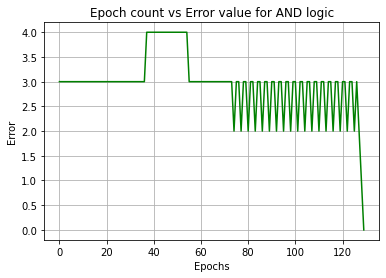

In [5]:
# Plotting the error values vs Epoch values graph
plt.plot(range(epochs_count), error_count, color='green')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epoch count vs Error value for AND logic')
plt.grid()
plt.show()

In [6]:
# Question A2:
# Repeat the Question A1 with different activation functions

# Defining the bipolar activation function
def activation_bipolar_function(number):
    if number > 0 :
        return 1
    elif number == 0 :
        return 0
    else:
        return -1

In [7]:
# Defining the Sigmoid activation function
def activation_sigmoid_function(number):
    return 1 / (1 + math.e ** (-number))

In [8]:
# Defining the sigmoid derivative function
def activation_sigmoid_derivative_function(number):
    return number * (1 - number)

In [9]:
# Defining the ReLU activation function
def activation_relu_function(number):
    if number > 0 :
        return number
    else:
        return 0

In [10]:
# Defining the function to apply a percetron
def perceptron(data_gates_input, target_output, w0, w1, w2, alpha, function):
    error_count = []
    epochs_count = 0
    converged = False
    while not converged and epochs_count != 1000:
        total_error = 0
        for i in range(len(data_gates_input)):
            data_a = data_gates_input[i, 0]
            data_b = data_gates_input[i, 1]
            perceptor_equation = w0 + data_a * w1 + data_b * w2
            if function == 'step':
                actual_output = activation_step_function(perceptor_equation)
            if function == 'bipolar':
                actual_output = activation_bipolar_function(perceptor_equation)
            if function == 'sigmoid':
                actual_output = activation_sigmoid_function(perceptor_equation)
            if function == 'relu':
                actual_output = activation_relu_function(perceptor_equation)
            error_value = target_output[i] - actual_output
            total_error += error_value ** 2

            w0 += alpha * error_value
            w1 += alpha * error_value * data_a
            w2 += alpha * error_value * data_b
        error_count.append(total_error)
        if total_error <= 0.002:
            converged = True
        epochs_count += 1
    print('Final weights of Perceptron are: \n')
    print('W0: ', w0, '\n')
    print('W1: ', w1, '\n')
    print('W2: ', w2, '\n')
    return epochs_count, error_count

In [11]:
# The parameters being defined
weight0 = 10
weight1 = 0.2
weight2 = -0.75
learning_rate = 0.05
target_output_and = [0, 0, 0, 1]

# Finding the error counts of the bipolar activation function perceptron
epochs_count_bipolar, error_count_bipolar = perceptron(data_gates_input, target_output_and, weight0, weight1, weight2, learning_rate, 'bipolar')
print('The number of epochs are: ', epochs_count_bipolar)
print('The error counts of the bipolar step function perceptron are: ', error_count_bipolar)

# Finding the error counts of the sigmoid activation function perceptron
epochs_count_sigmoid, error_count_sigmoid = perceptron(data_gates_input, target_output_and, weight0, weight1, weight2, learning_rate, 'sigmoid')
print('The number of epochs are: ', epochs_count_sigmoid)
print('The error counts of the sigmoid step function perceptron are: ', error_count_sigmoid)

# Finding the error counts of the ReLU activation function perceptron
epochs_count_relu, error_count_relu = perceptron(data_gates_input, target_output_and, weight0, weight1, weight2, learning_rate, 'relu')
print('The number of epochs are: ', epochs_count_relu)
print('The error counts of the ReLU step function perceptron are: ', error_count_relu)

Final weights of Perceptron are: 

W0:  -0.0999999999999975 

W1:  0.09999999999999902 

W2:  0.05000000000000643 

The number of epochs are:  1000
The error counts of the bipolar step function perceptron are:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 3, 3, 7, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7,

Final weights of Perceptron are: 

W0:  -0.2999999999999812 

W1:  0.19999999999999998 

W2:  0.15000000000000005 

Final weights of Perceptron are: 

W0:  -0.599999999999998 

W1:  0.39999999999999997 

W2:  0.24999999999999978 

Final weights of Perceptron are: 

W0:  -0.2000000000000009 

W1:  0.2 

W2:  0.1500000000000002 

Final weights of Perceptron are: 

W0:  -1.2000000000000044 

W1:  1.0000000000000002 

W2:  0.4500000000000002 

Final weights of Perceptron are: 

W0:  -1.5 

W1:  1.2 

W2:  0.75 

Final weights of Perceptron are: 

W0:  -1.999999999999997 

W1:  1.4 

W2:  1.0499999999999998 

Final weights of Perceptron are: 

W0:  -1.9 

W1:  1.5999999999999999 

W2:  0.6500000000000004 

Final weights of Perceptron are: 

W0:  -2.0000000000000004 

W1:  1.8 

W2:  0.8499999999999996 

Final weights of Perceptron are: 

W0:  -2.600000000000002 

W1:  2.0 

W2:  1.0500000000000003 

Final weights of Perceptron are: 

W0:  -3 

W1:  2.2 

W2:  1.25 



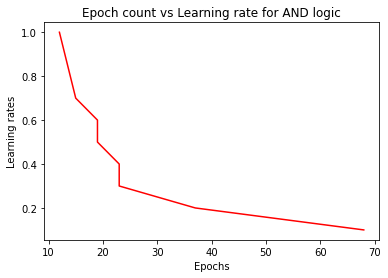

In [12]:
# Question A3:
# With changing learning rates and apply step activation function perceptron

weight0 = 10
weight1 = 0.2
weight2 = -0.75
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
target_output_and = [0, 0, 0, 1]
epochs_count_learning_and = []
# Applying the activation function
for i in learning_rates:
    epochs_count_step_and, error_count_step_and = perceptron(data_gates_input, target_output_and, weight0, weight1, weight2, i, 'step')
    epochs_count_learning_and.append(epochs_count_step_and)

# Plotting epochs counts against learning rates
plt.plot(epochs_count_learning_and, learning_rates, color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Learning rates')
plt.title('Epoch count vs Learning rate for AND logic')
plt.show()

Final weights of Perceptron are: 

W0:  0.09999999999999236 

W1:  -0.09999999999999969 

W2:  -0.09999999999999969 

The number of epochs are:  1000
The error counts of the step activation function perceptron are:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 

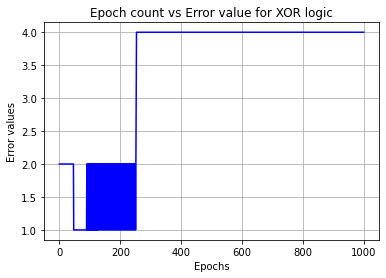

In [13]:
# Question A4:
# Repeating the questions A1 - A3 for XOR logic
weight0 = 10
weight1 = 0.2
weight2 = -0.75
learning_rate = 0.05

data_gates_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output_xor = [0, 1, 1, 0]

# Question A1 for XOR logic
epochs_count_step, error_count_step = perceptron(data_gates_input, target_output_xor, weight0, weight1, weight2, learning_rate, 'step')
print('The number of epochs are: ', epochs_count_step)
print('The error counts of the step activation function perceptron are: ', error_count_step)

# Plotting the epochs count vs error counts for XOR logic

plt.plot(range(epochs_count_step), error_count_step, color='blue')
plt.xlabel('Epochs')
plt.ylabel('Error values')
plt.title('Epoch count vs Error value for XOR logic')
plt.grid()
plt.show()

In [14]:
# Question A2 for XOR logic

# Finding the error counts of the bipolar activation function perceptron
epochs_count_bipolar_xor, error_count_bipolar_xor = perceptron(data_gates_input, target_output_xor, weight0, weight1, weight2, learning_rate, 'bipolar')
print('The number of epochs are: ', epochs_count_bipolar_xor)
print('The error counts of the bipolar step function perceptron are: ', error_count_bipolar_xor)

# Finding the error counts of the sigmoid activation function perceptron
epochs_count_sigmoid_xor, error_count_sigmoid_xor = perceptron(data_gates_input, target_output_xor, weight0, weight1, weight2, learning_rate, 'sigmoid')
print('The number of epochs are: ', epochs_count_sigmoid_xor)
print('The error counts of the sigmoid step function perceptron are: ', error_count_sigmoid_xor)

# Finding the error counts of the ReLU activation function perceptron
epochs_count_relu_xor, error_count_relu_xor = perceptron(data_gates_input, target_output_xor, weight0, weight1, weight2, learning_rate, 'relu')
print('The number of epochs are: ', epochs_count_relu_xor)
print('The error counts of the ReLU step function perceptron are: ', error_count_relu_xor)

Final weights of Perceptron are: 

W0:  0.1999999999999919 

W1:  -0.09999999999999969 

W2:  -0.15000000000000013 

The number of epochs are:  1000
The error counts of the bipolar step function perceptron are:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

Final weights of Perceptron are: 

W0:  -0.2999999999999812 

W1:  0.19999999999999998 

W2:  0.15000000000000005 

Final weights of Perceptron are: 

W0:  -0.599999999999998 

W1:  0.39999999999999997 

W2:  0.24999999999999978 

Final weights of Perceptron are: 

W0:  -0.2000000000000009 

W1:  0.2 

W2:  0.1500000000000002 

Final weights of Perceptron are: 

W0:  -1.2000000000000044 

W1:  1.0000000000000002 

W2:  0.4500000000000002 

Final weights of Perceptron are: 

W0:  -1.5 

W1:  1.2 

W2:  0.75 

Final weights of Perceptron are: 

W0:  -1.999999999999997 

W1:  1.4 

W2:  1.0499999999999998 

Final weights of Perceptron are: 

W0:  -1.9 

W1:  1.5999999999999999 

W2:  0.6500000000000004 

Final weights of Perceptron are: 

W0:  -2.0000000000000004 

W1:  1.8 

W2:  0.8499999999999996 

Final weights of Perceptron are: 

W0:  -2.600000000000002 

W1:  2.0 

W2:  1.0500000000000003 

Final weights of Perceptron are: 

W0:  -3 

W1:  2.2 

W2:  1.25 



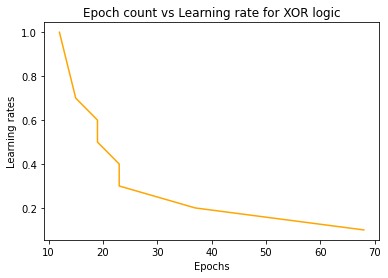

In [15]:
# Question A3 for XOR logic

learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
epochs_count_learning_xor =[]
for i in learning_rates:
    epochs_count_step, error_count_step = perceptron(data_gates_input, target_output_and, weight0, weight1, weight2, i, 'step')
    epochs_count_learning_xor.append(epochs_count_step)

# Plotting epochs counts against learning rates
plt.plot(epochs_count_learning_xor, learning_rates, color = 'orange')
plt.xlabel('Epochs')
plt.ylabel('Learning rates')
plt.title('Epoch count vs Learning rate for XOR logic')
plt.show()

In [16]:
# Question A5:
# Applying the perceptron with a sigmoid function with the weights and learning rate of our choice

# The dataframe of the customer data
dataframe_customer_data = {
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies (#)': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes (kg)': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets (#)': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment (Rs)': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198],
    'High Value Tx?': ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

dataframe_customer_data = pd.DataFrame(dataframe_customer_data)
dataframe_customer_data

,Customer,Candies (#),Mangoes (kg),Milk Packets (#),Payment (Rs),High Value Tx?
0,C_1,20,6,2,386,Yes
1,C_2,16,3,6,289,Yes
2,C_3,27,6,2,393,Yes
3,C_4,19,1,2,110,No
4,C_5,24,4,2,280,Yes
5,C_6,22,1,5,167,No
6,C_7,15,4,2,271,Yes
7,C_8,18,4,2,274,Yes
8,C_9,21,1,4,148,No
9,C_10,16,2,4,198,No


In [17]:
# Applying the label encoding on the output of the dataframe
from sklearn import preprocessing as prep

label_encoder = prep.LabelEncoder()

columns = ['High Value Tx?']
for cols in columns:
    dataframe_customer_data[cols]= label_encoder.fit_transform(dataframe_customer_data[cols])
dataframe_customer_data

,Customer,Candies (#),Mangoes (kg),Milk Packets (#),Payment (Rs),High Value Tx?
0,C_1,20,6,2,386,1
1,C_2,16,3,6,289,1
2,C_3,27,6,2,393,1
3,C_4,19,1,2,110,0
4,C_5,24,4,2,280,1
5,C_6,22,1,5,167,0
6,C_7,15,4,2,271,1
7,C_8,18,4,2,274,1
8,C_9,21,1,4,148,0
9,C_10,16,2,4,198,0


In [18]:
# Defining the function to apply a percetron on the dataframe
def perceptron_dataframe(dataframe_input, dataframe_output, w0, w1, w2, w3, alpha, function):
    error_count = []
    epochs_count = 0
    converged = False
    while not converged and epochs_count != 1000:
        total_error = 0
        for i in range(len(data_gates_input)):
            input_1 = dataframe_input.iloc[i, 0]
            input_2 = dataframe_input.iloc[i, 1]
            input_3 = dataframe_input.iloc[i, 2]
            input_4 = dataframe_input.iloc[i, 3]
            perceptor_equation = w0 * input_1 + w1 * input_2 + w2 * input_3 + w3 * input_4
            if function == 'step':
                actual_output = activation_step_function(perceptor_equation)
            if function == 'bipolar':
                actual_output = activation_bipolar_function(perceptor_equation)
            if function == 'sigmoid':
                actual_output = activation_sigmoid_function(perceptor_equation)
            if function == 'relu':
                actual_output = activation_relu_function(perceptor_equation)
            error_value = dataframe_output.iloc[i] - actual_output
            total_error += error_value ** 2

            w0 += alpha * error_value * input_1
            w1 += alpha * error_value * input_2
            w2 += alpha * error_value * input_3
            w3 += alpha * error_value * input_4
        error_count.append(total_error)
        if total_error <= 0.002:
            converged = True
        epochs_count += 1
    print('Final weights of Perceptron for the dataframe are: \n')
    print('W0: ', w0, '\n')
    print('W1: ', w1, '\n')
    print('W2: ', w2, '\n')
    print('W3: ', w3, '\n')
    return epochs_count, error_count

In [19]:
# Applying the perceptron of the dataframe given

weight0 = 0.2
weight1 = 0.3
weight2 = 0.8
weight3 = -1.5
learning_rate = 0.4
dataframe_input_perceptron = dataframe_customer_data.iloc[:, 1:5]
dataframe_output_perceptron = dataframe_customer_data.iloc[:, 5]

# Finding the error counts of the sigmoid activation function perceptron on the dataframe
epochs_count_sigmoid_data, error_count_sigmoid_data = perceptron_dataframe(dataframe_input_perceptron, dataframe_output_perceptron, weight0, weight1, weight2, weight3, learning_rate, 'sigmoid')
print('The number of epochs are: ', epochs_count_sigmoid_data)
print('The error counts of the sigmoid step function perceptron are: ', error_count_sigmoid_data)

Final weights of Perceptron for the dataframe are: 

W0:  -163.39999999999992 

W1:  9.499999999999996 

W2:  -16.800000000000004 

W3:  24.10000000000005 

The number of epochs are:  32
The error counts of the sigmoid step function perceptron are:  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0]


C:\Users\pavan\AppData\Local\Temp/ipykernel_10148/3359918862.py:3: RuntimeWarning: overflow encountered in double_scalars
  return 1 / (1 + math.e ** (-number))


In [20]:
# Question A6:
# Comparing the pseudo-inverse matrix application on the dataframe of customer data

def pseudo_inverse_method(dataframe_input, dataframe_output):
    matrix_input = np.matrix(dataframe_input)
    matrix_output = np.matrix(dataframe_output).reshape(10, 1)
    pseudo_inverse_matrix_input = np.matrix(np.linalg.pinv(matrix_input))
    matrix_solution = np.matmul(pseudo_inverse_matrix_input, matrix_output)
    return matrix_solution

In [21]:
# Getting the solution of the weights that have to applied for each attribute
dataframe_input_psinv = dataframe_customer_data.iloc[:, 1:5]
dataframe_output_psinv = dataframe_customer_data.iloc[:, 5]

dataframe_solution = pseudo_inverse_method(dataframe_input_psinv, dataframe_output_psinv)
print('The solution for the dataframe using the pseudo-inverse matrix method is: \n', dataframe_solution)

The solution for the dataframe using the pseudo-inverse matrix method is: 
 [[-0.02423666]
 [ 0.01257911]
 [-0.03683543]
 [ 0.00457696]]


In [22]:
# Question A7:
# Creating a two layer neural network for AND gate logic

# Input data for the AND gate
data_input_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target output for the AND gate
data_output_and = np.array([[0], [0], [0], [1]])

# Initialize random weights for the network
np.random.seed(1)
input_neurons = 2
hidden1_neurons = 2
hidden2_neurons = 2  # Renamed Hidden1 to Hidden2 for clarity
output_neurons = 1
learning_rate = 0.05

# Initialize weights and biases with more descriptive names
weights_input_hidden1 = np.random.uniform(size=(input_neurons, hidden1_neurons))
bias_hidden1 = np.random.uniform(size=(1, hidden1_neurons))
weights_hidden1_hidden2 = np.random.uniform(size=(hidden1_neurons, hidden2_neurons))
bias_hidden2 = np.random.uniform(size=(1, hidden2_neurons))
weights_hidden2_output = np.random.uniform(size=(hidden2_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training the neural network
epoch_counts = 1000
for epoch in range(1, epoch_counts+1):
    # Forward propagation
    hidden1_input = np.dot(data_input_and, weights_input_hidden1) + bias_hidden1
    hidden1_output = activation_sigmoid_function(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_output = activation_sigmoid_function(hidden2_input)
    output_input = np.dot(hidden2_output, weights_hidden2_output) + bias_output
    predicted_output = activation_sigmoid_function(output_input)

    # Calculate the error
    error = data_output_and - predicted_output

    # Backpropagation
    delta_output = error * activation_sigmoid_derivative_function(predicted_output)
    error_hidden2 = delta_output.dot(weights_hidden2_output.T)
    delta_hidden2 = error_hidden2 * activation_sigmoid_derivative_function(hidden2_output)
    error_hidden1 = delta_hidden2.dot(weights_hidden1_hidden2.T)
    delta_hidden1 = error_hidden1 * activation_sigmoid_derivative_function(hidden1_output)

    # Update weights and biases
    weights_hidden2_output += hidden2_output.T.dot(delta_output) * learning_rate
    weights_hidden1_hidden2 += hidden1_output.T.dot(delta_hidden2) * learning_rate
    weights_input_hidden1 += data_input_and.T.dot(delta_hidden1) * learning_rate
    bias_output += np.sum(delta_output, axis=0) * learning_rate
    bias_hidden2 += np.sum(delta_hidden2, axis=0) * learning_rate
    bias_hidden1 += np.sum(delta_hidden1, axis=0) * learning_rate

    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        break

# Test the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = activation_sigmoid_function(np.dot( activation_sigmoid_function(np.dot( activation_sigmoid_function(np.dot(test_input, weights_input_hidden1) + bias_hidden1), weights_hidden1_hidden2) + bias_hidden2), weights_hidden2_output) + bias_output)

print("Input:")
print(test_input)
print("Predicted Output:")
print(predicted_output)
print("Converged after ", epoch_counts, " epochs.")

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Output:
[[0.25216543]
 [0.25209223]
 [0.25196733]
 [0.25190172]]
Converged after  1000  epochs.


In [23]:
# Question A8:
# Applying th same function for XOR logic

# Input data for the XOR gate
data_input_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Target output for the XOR gate
data_output_xor = np.array([[0], [1], [1], [0]])

# Initialize random weights for the network
np.random.seed(1)
input_neurons = 2
hidden_layer1_neurons = 2
hidden_layer2_neurons = 2
output_neurons = 1
learning_rate = 0.05

# Initialize weights and biases with more descriptive names
weights_input_hidden1 = np.random.uniform(size=(input_neurons, hidden_layer1_neurons))
bias_hidden1 = np.random.uniform(size=(1, hidden_layer1_neurons))
weights_hidden1_hidden2 = np.random.uniform(size=(hidden_layer1_neurons, hidden_layer2_neurons))
bias_hidden2 = np.random.uniform(size=(1, hidden_layer2_neurons))
weights_hidden2_output = np.random.uniform(size=(hidden_layer2_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training the neural network
epoch_counts = 1000
for epoch in range(1, epoch_counts+1):
    # Forward propagation
    hidden1_input = np.dot(data_input_and, weights_input_hidden1) + bias_hidden1
    hidden1_output = activation_sigmoid_function(hidden1_input)
    hidden2_input = np.dot(hidden1_output, weights_hidden1_hidden2) + bias_hidden2
    hidden2_output = activation_sigmoid_function(hidden2_input)
    output_input = np.dot(hidden2_output, weights_hidden2_output) + bias_output
    predicted_output = activation_sigmoid_function(output_input)

    # Calculate the error
    error_value = data_output_and - predicted_output

    # Backpropagation
    delta_output = error_value * activation_sigmoid_derivative_function(predicted_output)
    error_hidden2 = delta_output.dot(weights_hidden2_output.T)
    delta_hidden2 = error_hidden2 * activation_sigmoid_derivative_function(hidden2_output)
    error_hidden1 = delta_hidden2.dot(weights_hidden1_hidden2.T)
    delta_hidden1 = error_hidden1 * activation_sigmoid_derivative_function(hidden1_output)

    # Update weights and biases
    weights_hidden2_output += hidden2_output.T.dot(delta_output) * learning_rate
    weights_hidden1_hidden2 += hidden1_output.T.dot(delta_hidden2) * learning_rate
    weights_input_hidden1 += data_input_and.T.dot(delta_hidden1) * learning_rate
    bias_output += np.sum(delta_output, axis=0) * learning_rate
    bias_hidden2 += np.sum(delta_hidden2, axis=0) * learning_rate
    bias_hidden1 += np.sum(delta_hidden1, axis=0) * learning_rate

    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        break

# Test the trained network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = activation_sigmoid_function(np.dot( activation_sigmoid_function(np.dot( activation_sigmoid_function(np.dot(test_input, weights_input_hidden1) + bias_hidden1), weights_hidden1_hidden2) + bias_hidden2), weights_hidden2_output) + bias_output)

print("Input:")
print(test_input)
print("Predicted Output:")
print(predicted_output)
print("Converged after ", epoch_counts, " epochs.")

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Output:
[[0.25216543]
 [0.25209223]
 [0.25196733]
 [0.25190172]]
Converged after  1000  epochs.


In [24]:
# Question A9:
# Performing A1 and A2 questions on the neural network

In [25]:
# Question A10:
# Creating the dataframe for the AND logic
from sklearn import neural_network

dataframe_and = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Output': [0, 0, 0, 1]
}
# Creating the dataframe for the XOR logic
dataframe_xor = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Output': [0, 1, 1, 0]
}
dataframe_and = pd.DataFrame(dataframe_and)
dataframe_xor = pd.DataFrame(dataframe_xor)

perceptron_model = neural_network.MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05, random_state=42)
# Applying the perceptron MLP model on AND logic
output_and = perceptron_model.fit(dataframe_and.iloc[:, 0:2], dataframe_and.iloc[:, 2])
print(output_and)
output_AND_predicted = perceptron_model.predict(dataframe_and.iloc[:, 0:2])
print("The predicted output for AND logic is: ", output_AND_predicted)

# Applying the perceptron MLP model on XOR logic
output_xor = perceptron_model.fit(dataframe_xor.iloc[:, 0:2], dataframe_xor.iloc[:, 2])
output_XOR_predicted = perceptron_model.predict(dataframe_xor.iloc[:, 0:2])
print("The predicted output for AND logic is: ", output_XOR_predicted)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,),
              learning_rate_init=0.05, max_iter=1000, random_state=42)
The predicted output for AND logic is:  [0 0 0 1]
The predicted output for AND logic is:  [0 1 1 0]


In [26]:
# Question A11:
# Applying the project dataframe on the MLP classifier

from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro 

#Insert your features and labels
samples = np.load(r'activation_maps_lines_image52_pixel.npy')
features = np.load(r'activation_maps_lines_image52_labelpixel.npy')

print("The shape of samples and featuresis:\n ",samples.shape,features.shape)
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)
samples = pd.DataFrame(samples,columns=np.arange(0,13))
samples['13']=features # Adding features coulmn into the samples dataset 
samples.info() 

The shape of samples and featuresis:
  (16384, 13) (16384, 1)
(16384, 13) (16384,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB


In [27]:
# Applying the neural network on the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
mlp_model = neural_network.MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, learning_rate_init=0.05, random_state=42)

input_data_project = samples.iloc[:, 0:13]
output_data_project = samples.iloc[:, 13]
input_project_data_train, input_project_data_test, output_project_data_train, output_project_data_test = train_test_split(input_data_project, output_data_project, test_size=0.3, random_state=42)

mlp_model.fit(input_project_data_train, output_project_data_train)
predicted_output = mlp_model.predict(input_project_data_test)
accuracy_value_mlp = accuracy_score(predicted_output, output_project_data_test)
print("The accuracy of the MLP classifier on the project data is: ", accuracy_value_mlp)
print(classification_report(output_project_data_test, predicted_output))

The accuracy of the MLP classifier on the project data is:  0.5593978844589097
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1392
           1       0.00      0.00      0.00       180
         128       0.00      0.00      0.00       594
         255       0.56      1.00      0.72      2750

    accuracy                           0.56      4916
   macro avg       0.14      0.25      0.18      4916
weighted avg       0.31      0.56      0.40      4916



C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
